In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve, precision_score, recall_score, f1_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)
print('::FAILAI PATH\'e::', os.listdir(path))

Path to dataset files: C:\Users\Lukas\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1
::FAILAI PATH'e:: ['Mall_Customers.csv']


In [4]:
df = pd.read_csv(r'C:\Users\Lukas\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.rename(columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'spending' }, inplace=True)
df.head(2)

,CustomerID,Gender,Age,Income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81


In [9]:
l = LabelEncoder().fit_transform(df['Gender'])
df['gender'] = l
df.head(2)

,CustomerID,Gender,Age,Income,spending,gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1


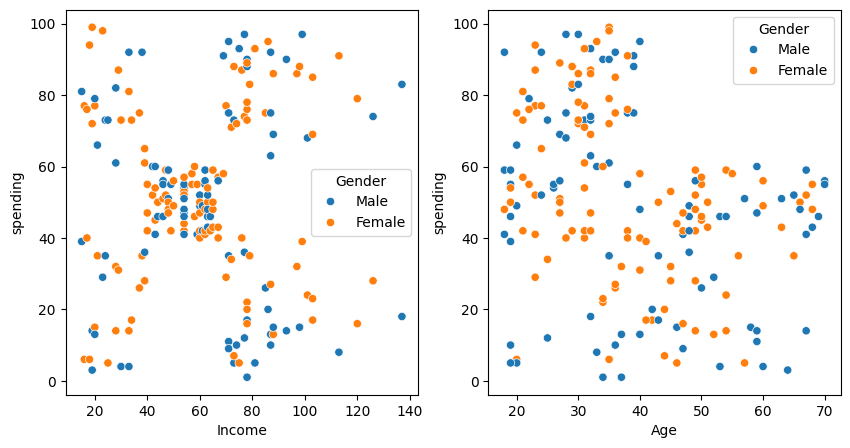

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=df, x='Income', y='spending', hue='Gender', ax=ax1)
sns.scatterplot(data=df, x='Age', y='spending', hue='Gender', ax=ax2)
plt.show()

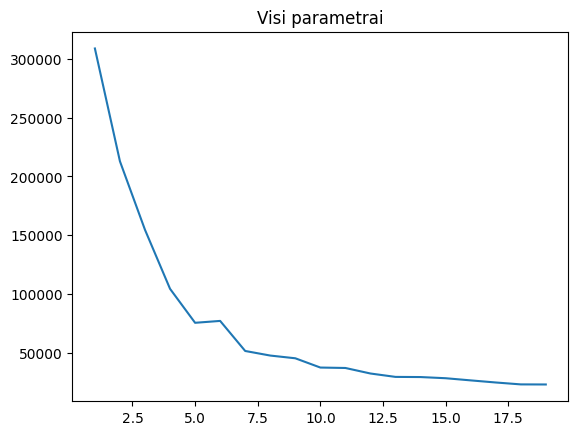

In [15]:
sse = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income', 'spending', 'gender']])
    sse.append(km.inertia_)

ax = sns.lineplot(x=[*range(1, 20)], y=sse)
plt.title('Visi parametrai')
plt.show()

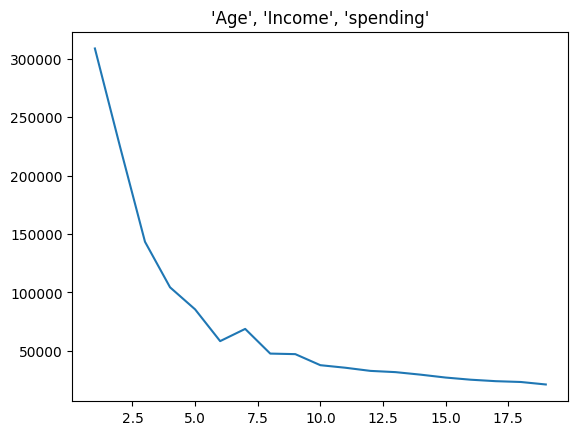

In [18]:
sse = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income', 'spending']])
    sse.append(km.inertia_)

ax = sns.lineplot(x=[*range(1, 20)], y=sse)
plt.title("'Age', 'Income', 'spending'")
plt.show()

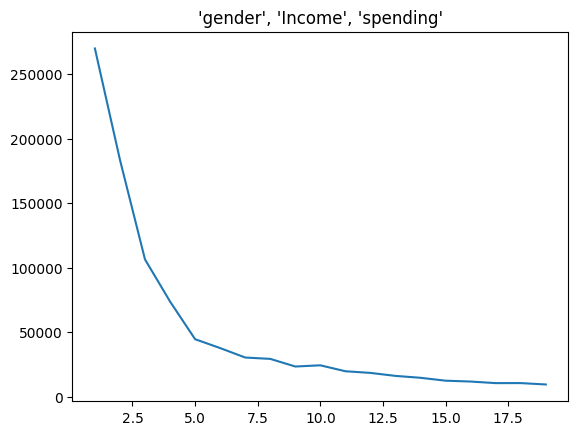

In [19]:
sse = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(df[['gender', 'Income', 'spending']])
    sse.append(km.inertia_)

ax = sns.lineplot(x=[*range(1, 20)], y=sse)
plt.title("'gender', 'Income', 'spending'")
plt.show()

In [ ]:
# Pagal elbow metodą tariam, kad yra 10 clusterių

In [31]:
X = df[['Age', 'Income', 'spending']]

kmeans = KMeans(n_clusters=7)

predicted_labels = kmeans.fit_predict(X[['Age', 'Income', 'spending']])
X['cluster'] = predicted_labels

In [29]:
X

,Age,Income,spending,cluster
0,19,15,39,1
1,21,15,81,1
2,20,16,6,2
3,23,16,77,1
4,31,17,40,2
...,...,...,...,...
195,35,120,79,0
196,45,126,28,3
197,32,126,74,0
198,32,137,18,3


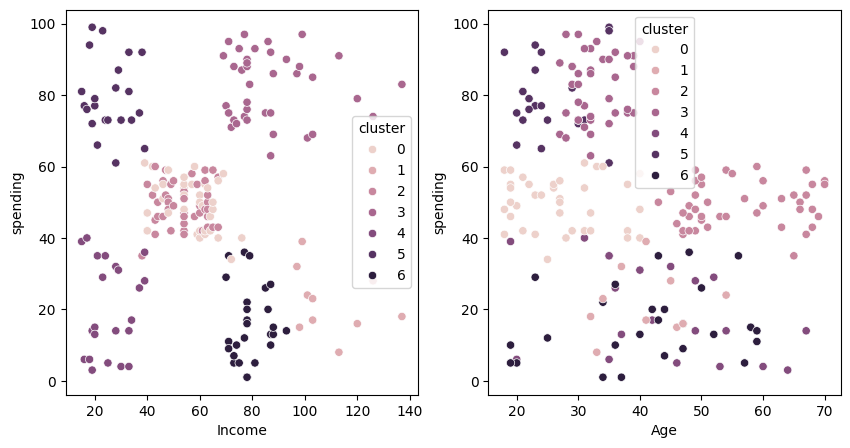

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=X, x='Income', y='spending', hue='cluster', ax=ax1)
sns.scatterplot(data=X, x='Age', y='spending', hue='cluster', ax=ax2)
plt.show()

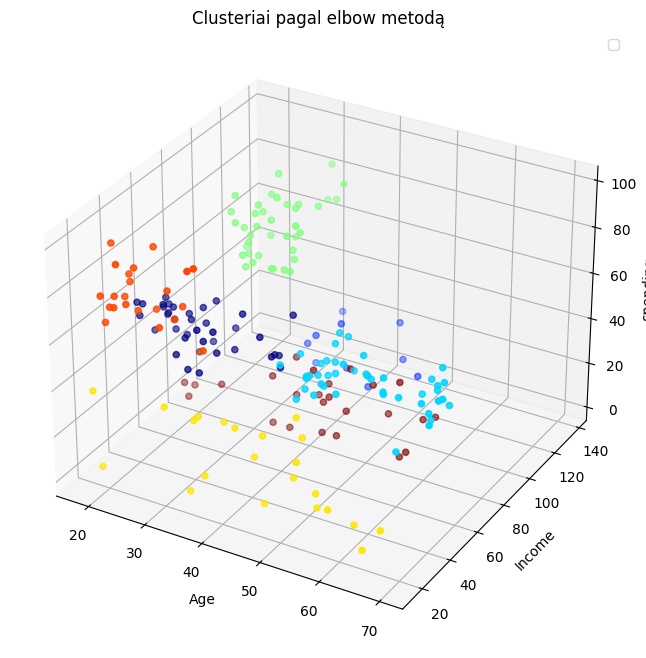

In [42]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting 3D scatter plot (e.g., using sepal length, sepal width, and petal length)
ax.scatter(X['Age'], X['Income'], X['spending'], c=X['cluster'], cmap='jet')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('spending')

# Show the plot
plt.title('Clusteriai pagal elbow metodą')
plt.legend()
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV # su gridsearchcv tuninsime parametrus
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 6 + 1),
'init': ['k-means++', 'random'],
'n_init': [5, 10, 15],
'max_iter': [100, 200, 300, 400, 500],
'tol': [0.0001, 0.001, 0.01],
'algorithm': ['auto', 'full', 'elkan', 'lloyd'],
'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X[['Age', 'Income', 'spending']]) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6, 'n_init': 5, 'random_state': 0, 'tol': 0.0001}
Optimal number of clusters based on parameter grid: 6


In [40]:
kmeans = KMeans(algorithm='elkan', init='k-means++', max_iter=100, n_clusters=6, n_init=5, random_state=0, tol=0.0001)

predicted_labels = kmeans.fit_predict(X[['Age', 'Income', 'spending']])
X['cluster_po_GS'] = predicted_labels

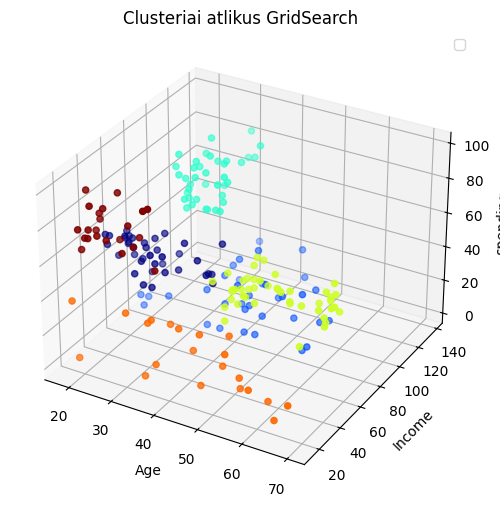

In [43]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting 3D scatter plot (e.g., using sepal length, sepal width, and petal length)
ax.scatter(X['Age'], X['Income'], X['spending'], c=X['cluster_po_GS'], cmap='jet')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('spending')

# Show the plot
plt.title('Clusteriai atlikus GridSearch')
plt.legend()
plt.show()

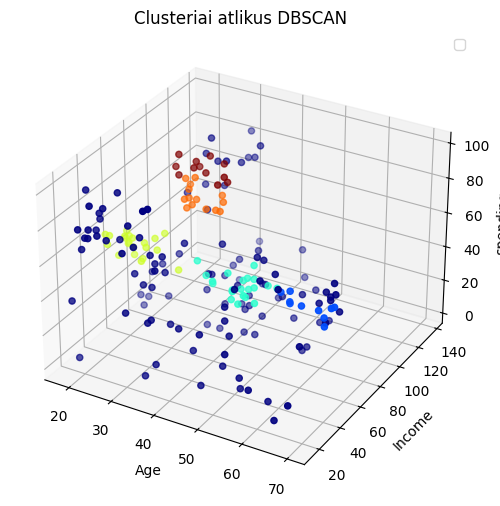

In [53]:
X['dbscan'] = DBSCAN(eps=10, min_samples=10).fit_predict(X[['Age', 'Income', 'spending']])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting 3D scatter plot 
ax.scatter(X['Age'], X['Income'], X['spending'], c=X['dbscan'], cmap='jet')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('spending')

# Show the plot
plt.title('Clusteriai atlikus DBSCAN')
plt.legend()
plt.show()

In [52]:
X

,Age,Income,spending,cluster,cluster_po_GS,dbscan
0,19,15,39,4,4,-1
1,21,15,81,5,5,0
2,20,16,6,4,4,-1
3,23,16,77,5,5,0
4,31,17,40,4,4,-1
...,...,...,...,...,...,...
195,35,120,79,3,2,-1
196,45,126,28,1,1,-1
197,32,126,74,3,2,-1
198,32,137,18,1,1,-1


In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)
print('::FAILAI PATH\'e::', os.listdir(path))

100%|██████████| 25.6k/25.6k [00:00<00:00, 1.75MB/s]

Extracting files...
Path to dataset files: C:\Users\Lukas\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2
::FAILAI PATH'e:: ['winequality-red.csv']


In [55]:
df = pd.read_csv(r'C:\Users\Lukas\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2\winequality-red.csv')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [57]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)


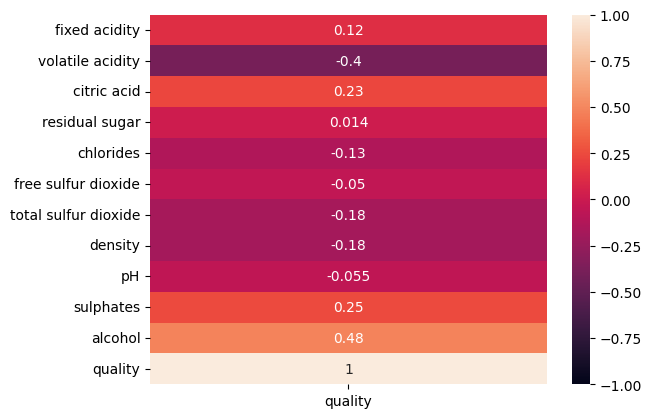

In [61]:
sns.heatmap(data=df.corr()['quality'].to_frame(), vmin=-1, vmax=1, annot=True)
plt.show()

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [71]:
train = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']]

In [72]:
scaler = StandardScaler()
scaler.fit(train[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']])
train_scaled = scaler.transform(train[['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']])

f1,f2,f3,f5,f6,f7,f8,f9 = zip(*train_scaled)
train['fixed acidity'] = f1
train['volatile acidity'] = f2
train['citric acid'] = f3
# train['residual sugar'] = f4
train['chlorides'] = f5
train['total sulfur dioxide'] = f6
train['density'] = f7
train['sulphates'] = f8
train['alcohol'] = f9

train.head(2)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,-0.524431,0.9320,-1.393258,-0.245623,-0.384050,0.584003,-0.578561,-0.954374,5
1,-0.294063,1.9158,-1.393258,0.200094,0.604073,0.048737,0.124822,-0.584575,5


In [73]:
X = train.drop(columns=['quality'])
y = train['quality'].values      # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fit score: 59.92647058823529
Accuracy score: 0.5992647058823529
Precision score: 0.28213429696480546
Recall score: 0.280934422521488
F1 score: 0.27835835188776364


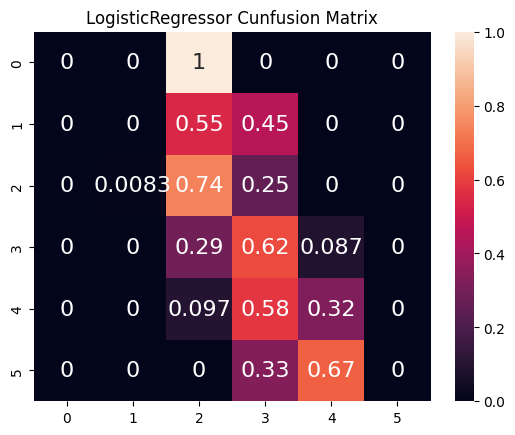

In [74]:
# Modeliai
logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)
fit_score = logreg.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('LogisticRegressor Cunfusion Matrix')
plt.show()

fit score: 51.10294117647059
Accuracy score: 0.5110294117647058
Precision score: 0.24502688172043008
Recall score: 0.25543724118731953
F1 score: 0.24895495996858266


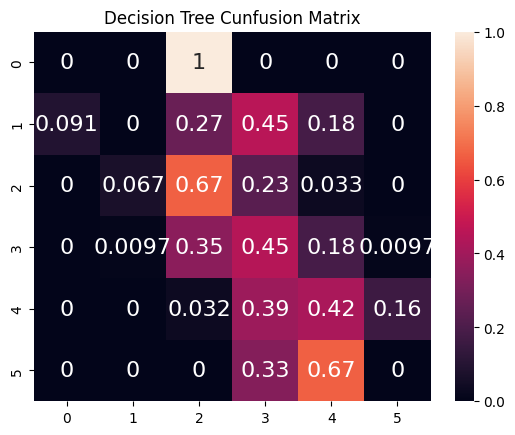

In [75]:
destree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = destree.predict(X_test)
fit_score = destree.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('Decision Tree Cunfusion Matrix')
plt.show()

fit score: 65.80882352941177
Accuracy score: 0.6580882352941176
Precision score: 0.32848731884057975
Recall score: 0.32492779343703243
F1 score: 0.32387182495673744


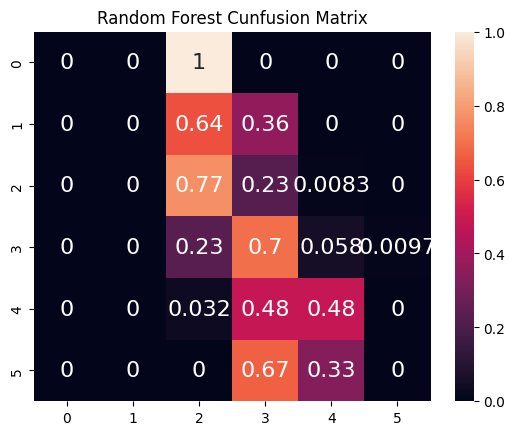

In [76]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
fit_score = rf.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc}')

precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision score: {precision}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall score: {recall}')

f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 score: {f1}')


cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})
plt.title('Random Forest Cunfusion Matrix')
plt.show()